# Proportion Overlap 

First, looking at all CpGs and what genomic feature they overlap. Then, looking at the methylated CpGs for each treatment combination and seeing what genomic features they overlap.

Then want to know if there is a difference in the proportion of methylated CpGs that overlap with genomic features. I'll do a chi-squared test of homogeneity to calculate stats on this. 

The null hypothesis that the methylated CpGs are independent of genomic location

In [3]:
library(tidyverse)

In [7]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/propOverlap_decimal.csv')
df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<chr>,<chr>,<int>,<int>,<dbl>
TE,CC,16875,132243,0.12760600
exons,CC,57957,132243,0.43826138
introns,CC,29638,132243,0.22411772
putativePromoter,CC,3529,132243,0.02668572
UTRs,CC,4165,132243,0.03149505
intergenic,CC,20079,132243,0.15183412
TE,CH,6346,54342,0.11677892
exons,CH,26233,54342,0.48273895
introns,CH,12045,54342,0.22165176


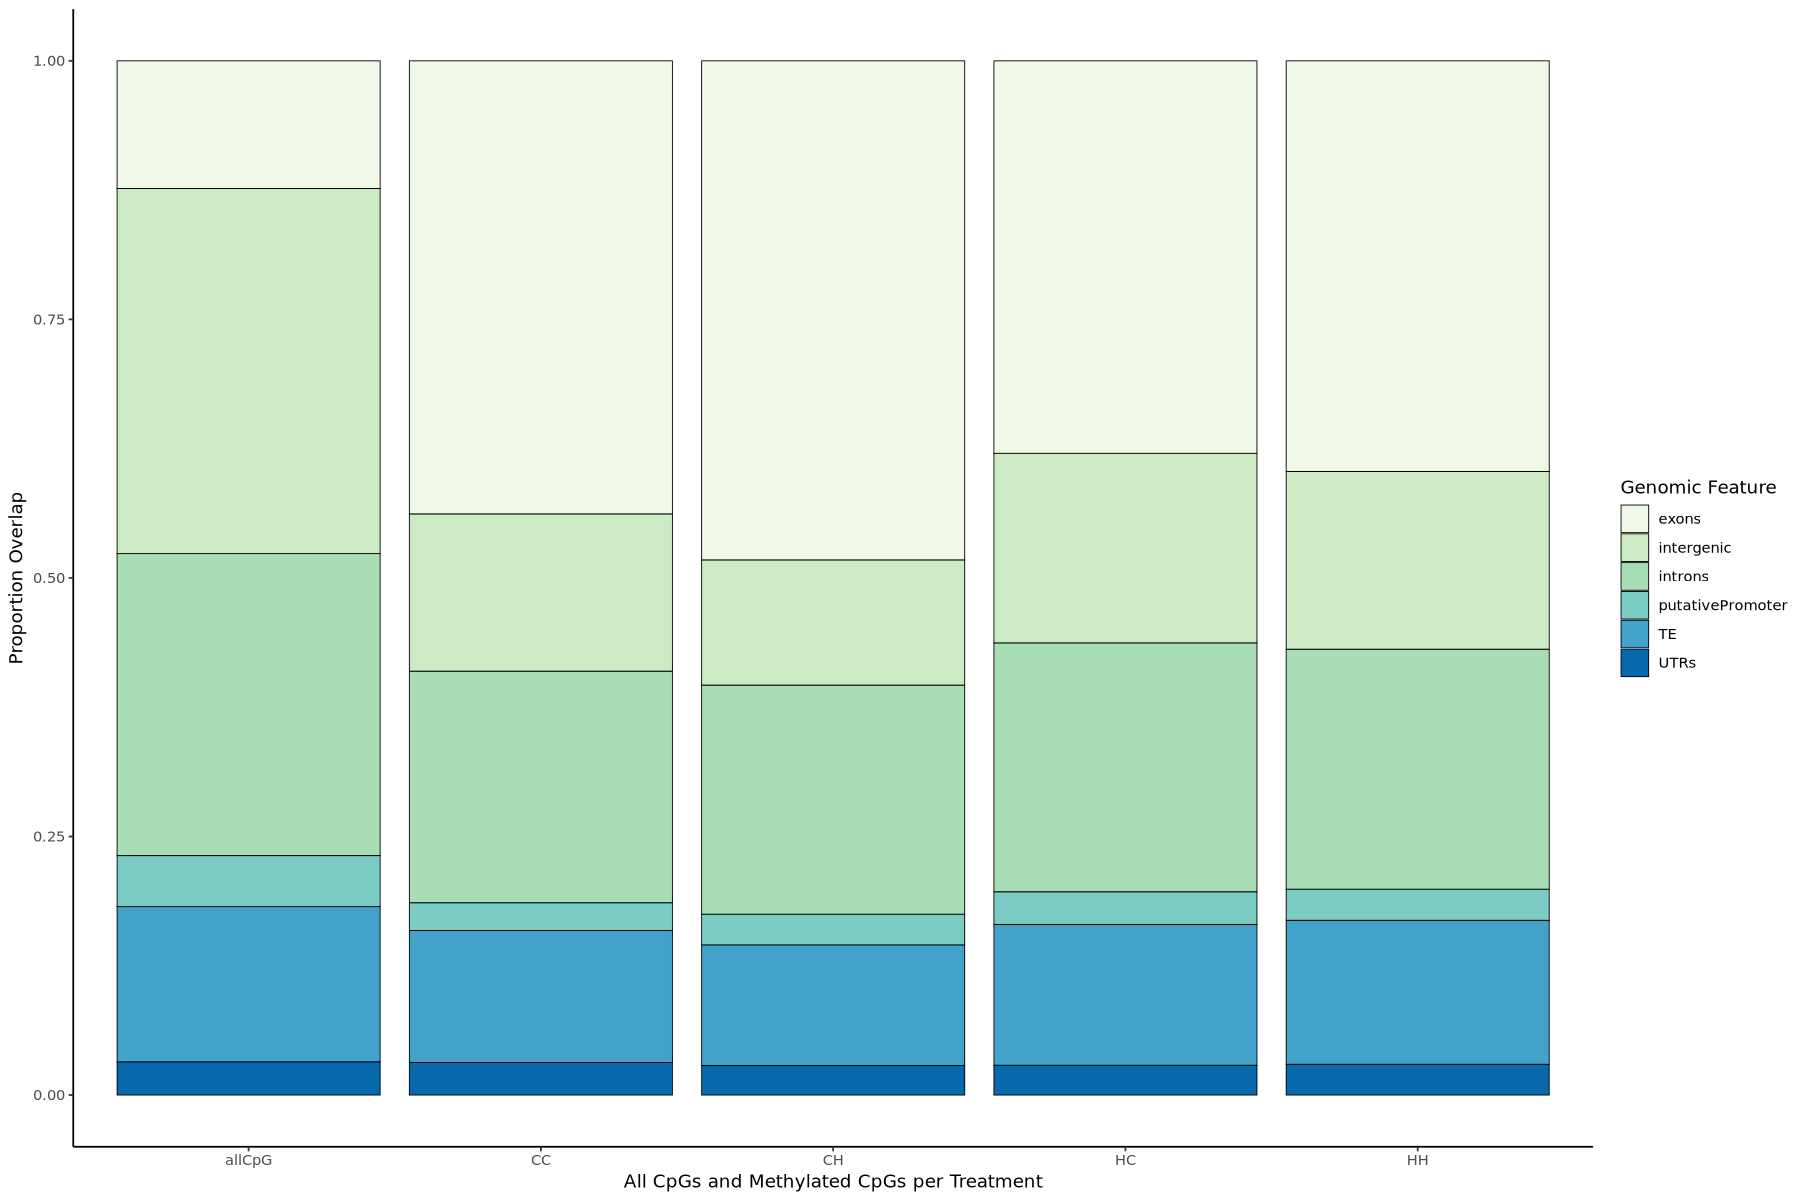

In [11]:
options(repr.plot.width=15, repr.plot.height=10)

propOv <- ggplot(df) +
 aes(x = treatment, y = proportion_overlap, fill = genomicFeature) +
 geom_col() +
 scale_fill_brewer(palette = "GnBu", 
 direction = 1) +
  geom_col(color = "black", size = 0.25) +
 labs(x = "All CpGs and Methylated CpGs per Treatment", y = "Proportion Overlap", 
 fill = "Genomic Feature") +
 theme_classic()

propOv

In [13]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/propOverlap.pdf', propOv, width=15, height=10)

So the allCpG column shows us the proportion of CpG dinucleotides that overlap with genomic features in the CV genome

CC, CH, HC, and HH show the proportion of *methylated* CpG dinucleotides. We might expect that the distribution of methylated CpGs would be even across genomic features, and therefore reflect the allCpGs column. However, that is not what is being observed - meaning, some genomic features (exons, intergenic regions, promoters) are being disproportionately methylated from what is expected. 

We can then compare CH, HC, and HH to CC to observe differences of methylation distibution in response to varying hypoxic stress.


Even though a first exposure to hypoxia results in more methylation of exons compared to first exposure of control (see [figure](https://github.com/jgmcdonough/CE18_methylRAD_analysis/blob/master/analysis/figures/exonMe_barplot.pdf)), the proportiong of methylation in exons are less in HC and HH compared to CC and CH.

### Conduct chi-squared tests of homogeneity

total vs. CC

In [28]:
# selecting only data for all CpGs and CC
cc <- filter(df, df$treatment == 'CC')$proportion_overlap
allCpG <- filter(df, df$treatment == 'allCpG')$proportion_overlap

# chi-square test
total_CC.test <- chisq.test(allCpG, cc)
total_CC.test

Warning message in chisq.test(allCpG, cc):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allCpG and cc
X-squared = 30, df = 25, p-value = 0.2243


In [30]:
# selecting only data for all CpGs and CC
ch <- filter(df, df$treatment == 'CH')$proportion_overlap

# chi-square test
total_CC.test <- chisq.test(allCpG, ch)
total_CC.test

Warning message in chisq.test(allCpG, ch):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allCpG and ch
X-squared = 30, df = 25, p-value = 0.2243


In [31]:
# selecting only data for all CpGs and CC
hc <- filter(df, df$treatment == 'HC')$proportion_overlap

# chi-square test
total_CC.test <- chisq.test(allCpG, hc)
total_CC.test

Warning message in chisq.test(allCpG, hc):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allCpG and hc
X-squared = 30, df = 25, p-value = 0.2243


In [32]:
# selecting only data for all CpGs and CC
hh <- filter(df, df$treatment == 'HH')$proportion_overlap

# chi-square test
total_CC.test <- chisq.test(allCpG, hh)
total_CC.test

Warning message in chisq.test(allCpG, hh):
“Chi-squared approximation may be incorrect”



	Pearson's Chi-squared test

data:  allCpG and hh
X-squared = 30, df = 25, p-value = 0.2243


I suspect I'm not doing something right here...

## 3/5 replicates for CpG methylation

A CpG dinucleotide is methylated if the majority of the replicates in a treatment (3/5) have at least 5 sequences

repeating code above with new methylation calling

(also, proportion overlap is out of 100%)

In [4]:
df <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/genomic_feature_tracks/majorityMe_propOverlap.csv')
df

genomicFeature,treatment,propOverlap,propOverlap_sum,proportion_overlap
<chr>,<chr>,<int>,<int>,<dbl>
TE,CC,11289,97527,11.58
exons,CC,42577,97527,43.66
introns,CC,19342,97527,19.83
putativePromoter,CC,2081,97527,2.13
UTRs,CC,2964,97527,3.04
intergenic,CC,11929,97527,12.23
no_overlap,CC,7345,97527,7.53
TE,CH,13304,112541,11.82
exons,CH,46527,112541,41.34


In [30]:
# removing underscore in 'no_overlap'
df$genomicFeature <- gsub("no_overlap", "no overlap", df$genomicFeature)
df$treatment <- gsub("allCpG", "all CpGs", df$treatment)

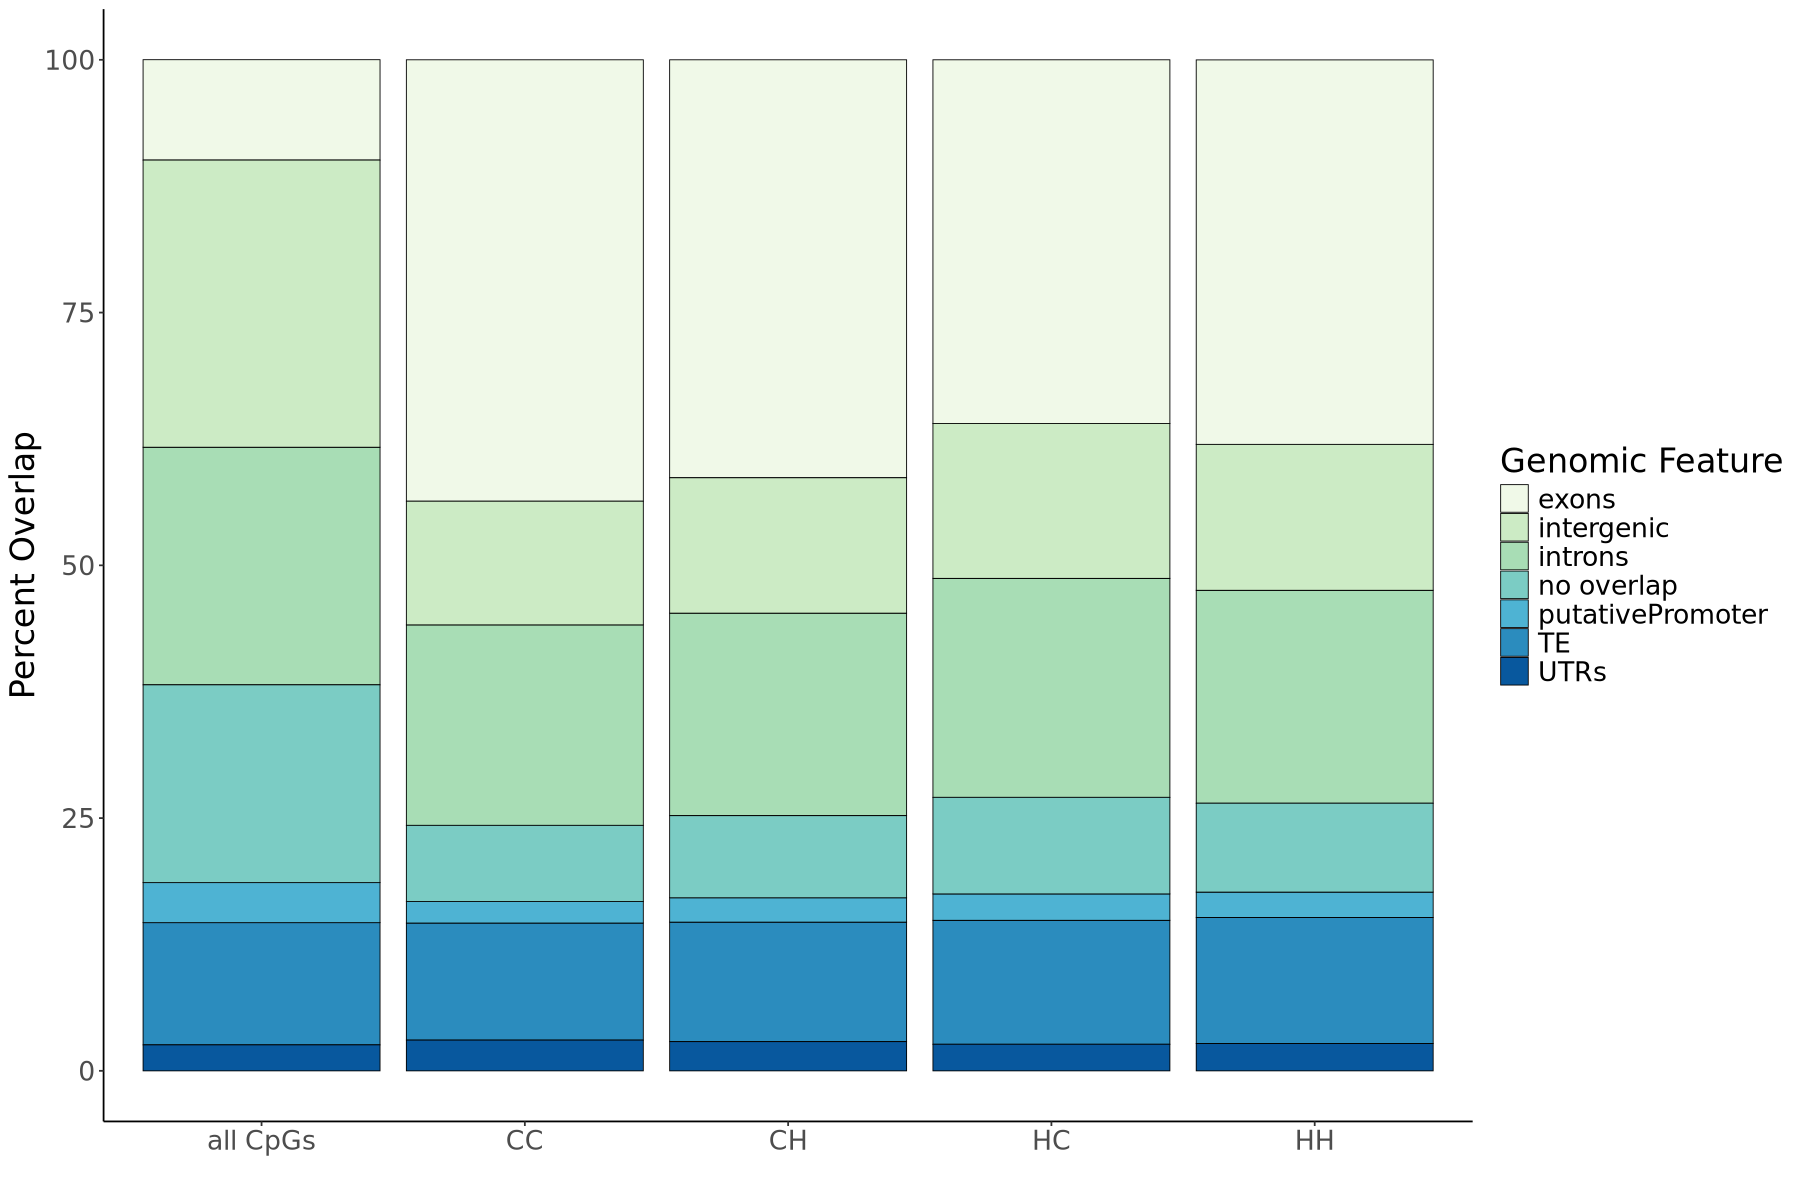

In [31]:
options(repr.plot.width=15, repr.plot.height=10)

propOv <- ggplot(df) +
 aes(x = treatment, y = proportion_overlap, fill = genomicFeature) +
 geom_col() +
 scale_fill_brewer(palette = "GnBu", 
 direction = 1) +
  geom_col(color = "black", size = 0.25) +
 labs(x = "", y = "Percent Overlap", 
 fill = "Genomic Feature") +
 theme_classic() +
theme(text = element_text(size = 20)) 

propOv

In [13]:
ggsave('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/new_propOverlap.pdf', propOv, width=15, height=10)

I would like to add a bracket to group the treatments into 'methylated CpGs' - following this [thread](https://stackoverflow.com/questions/66603462/adding-square-brackets-to-group-axis-labels-in-ggplot2?rq=3) in hopes of achieving this

[pBrackets manual](https://cran.r-project.org/web/packages/pBrackets/pBrackets.pdf)